In [1]:
# Loading and Inspection of Data:

import pandas as pd

df = pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [2]:
# Cleaning the Data:

df.columns = df.columns.str.strip()
df["Dates"] = pd.to_datetime(df["Dates"])
df = df.sort_values("Dates")

C:\Users\LENGE\AppData\Local\Temp\ipykernel_12572\270558097.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dates"] = pd.to_datetime(df["Dates"])


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes


,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


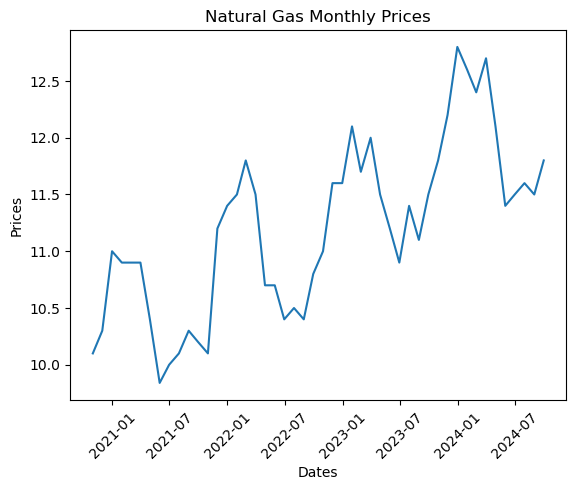

In [4]:
# Visualizing the Time Series:

import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["Dates"], df["Prices"])
plt.title("Natural Gas Monthly Prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.xticks(rotation=45)
plt.show()



In [5]:
# Extraction of Seasonality features:

df['Month'] = df['Dates'].dt.month # type: ignore
df['Time_Index'] = range(len(df))

In [6]:
# Building the Quantitative Model

# creation of seasonal dummies:

X = pd.get_dummies(df[['Time_Index', 'Month']], columns=['Month'], drop_first=True)
y = df['Prices']

In [7]:
# Regression-based time series decompostion:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

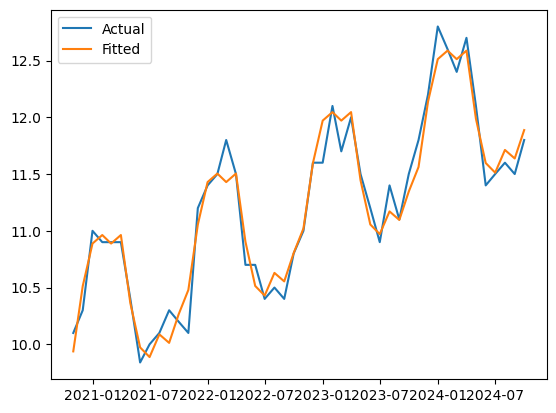

In [8]:
# Testing of Regression MOdel Fit:

df['Predicted'] = model.predict(X)

plt.figure()
plt.plot(df['Dates'], df['Prices'], label='Actual')
plt.plot(df['Dates'], df['Predicted'], label='Fitted')
plt.legend()
plt.show()

In [9]:
# Forecasting 12 Months Forwar

# 1. Getting the last date:
last_date = df['Dates'].iloc[-1]

In [10]:
# 2. Generating next 12 months:

future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

C:\Users\LENGE\AppData\Local\Temp\ipykernel_12572\3430638948.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')


In [11]:
# 2. Generating next 12 months:

future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='ME')

In [12]:
# For each future date:
# - time index was computed,
# - date was extracted, 
# - dummy structure created, and
# - prediction was done.

# Which is: Future TIme_Index = months since first observation.

In [13]:
# Building the Required Function:

def estimate_price(input_date):
    input_date = pd.to_datetime(input_date) 

    months_diff = ((input_date.year - df['Dates'].iloc[0].year) * 12 + (input_date.month - df['Dates'].iloc[0].month))

    month = input_date.month

    # feature row
    row = {'Time_Index': months_diff}

    for m in range(2, 13):
        row[f'Month_{m}'] = 1 if month == m else 0

    row_df = pd.DataFrame([row])

    return model.predict(row_df)[0]


In [14]:
# Model testing:

estimate_price("2023-06-30")
estimate_price("2025-06-30")

12.053749999999997